# Keras
* MXNet, Deeplearning4j, 첸서플로, CNTK, Theano 등 다양한 프레임워크 위에서 수행
* 직관적 추상화 API를 통해 딥러닝 모델을 쉽게 만들 수 있음
* 동일 코드로 CPU와 GPU에서 실행 가능

## tensor
* 머신 러닝의 기본 구성 요소
* 숫자 데이터를 위한 컨테이너
* 임의의 차원 개수를 가짐
* 텐서에서의 차원을 축 이라고 부름

### 스칼라(0D 텐서)
* 하나의 숫자만 담고 있는 텐서
* 스칼라 텐서의 축 개수는 0(ndim == 0)

In [1]:
import numpy as np
x = np.array(15)
print(x)
print(x.ndim)

15
0


### 벡터(1D 텐서)
* 숫자의 배열
* 벡터 텐서의 축 개수는 1(ndim == 1)

In [2]:
import numpy as np
x = np.array([15,14,13,12,11])
print(x)
print(x.ndim)

[15 14 13 12 11]
1


### 행렬(2D 텐서)
* 벡터의 배열
* 행렬 텐서의 축 개수는 2(ndim == 2)

In [3]:
import numpy as np
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print(x.ndim)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
2


### 3D 텐서
* 행렬의 배열
* 3D 텐서의 축 개수는 3(ndim == 3

In [5]:
import numpy as np
x = np.arange(0,12)
x.shape = (2,2,3)
print(x)
print(x.ndim)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
3


### 랭크 : 축의 개수
* 텐서의 차원
* 0차원, 1차원, 2차원 텐서는 각각 스칼라, 벡터, 행렬 이라는 이름으로 불림
* Numpy로 만든 텐서의 경우 ndim 속성으로 확인 가능

### 크기(shape)
* 텐서의 각 축 마다 얼마의 차원이 있는지를 나타내는 값
* Numpy로 만든 텐서의 경우 shape 속성으로 확인 가능

### 데이터 타입(dtype)
* 텐서에 포함된 데이터의 타입
* float32, uint8, float64

### 텐서의 실제 사례
1. 벡터 데이터
* (samples, features) 크이의 2D 텐서
* 첫번째는 샘플 축, 두번째는 특성 축
* 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터 10만 건
= shape = (100000, 3)

2. 시계열 데이터
* (samples, timesteps, features) 크기의 3D 텐서
* 첫번째는 샘플 축, 두번째는 순서 축, 세번째는 특성 축
* 1분마다 현재 주식 가격, 지난 1분기 동안 최고가격, 최소가격을 측정한 250일치 데이터
* (250, 390, 2) : 주식시장 하루 거래 시간은 390분

3. 이미지 데이터 
* 4D 텐서 (samples, height, width, channels)
* 첫번째는 샘플 축, 두번째는 높이 축, 세번째는 넓이 축, 네번째는 컬러 채널 축
* 가로 픽셀 28, 세로 픽셀 28인 3채널(RGB), 이미지 100건
* (100, 28, 28, 3)

## 작업 흐름
* 입력텐서와 타깃 텐서로 이루어진 훈련 데이터 정의
* 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(모델)을 정의
* 손실 함수, 옵티마이저, 모니러링을 위한 성능 지표 선택
* 훈련 데이터에 대해 모델의 fit() 메서드를 실행

In [8]:
import numpy as np
input_tensor = np.random.rand(100,50)
target_tensor = np.random.randint(low=0, high=10, size = 100)

print(input_tensor.shape)
print(target_tensor.shape)

(100, 50)
(100,)


In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(units=32, activation='relu', input_shape=(50,)))
model.add(layers.Dense(units=10, activation='softmax'))

* unit : 퍼셉트론의 개수
* input_shape : 입력층에만 속성으로 입력하며 입력층의 모양
* 출력층의 units 개수 : target에 따라 달라지며 target이 10개로 나누어 지면 마찬가지로 units을 10개로 설정해 주면 됨

In [15]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss='mse', metrics = ['accuracy'])
# loss function : mse, accuracy 표시

model.fit(x=input_tensor, y=target_tensor, batch_size=10, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8581 - accuracy: 0.1200
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0900
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0800
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.1400
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0900
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.1000
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.1200
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0900
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0600
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 28.8580 - accuracy: 0.0800


# MNIST

In [31]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [32]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
print(train_labels.shape)
print(train_labels[:3,:])

print(test_labels.shape)
print(test_labels[:3,:])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential() # 모델 생성
model.add(layers.Dense(units=512, activation='relu', input_shape=(28*28,))) # layer 추가
model.add(layers.Dense(units=10, activation='softmax')) # layer 추가

## summary

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


* Output Shape의 None : batch size : 현재는 몇이 들어올지 알 수 없기 때문에 None으로 표기
* 가중치 dense 1은 512 \* 28 * 28 + 512 = 401920
* 가중치 dense 2는 10 * 512 + 10 = 5130

* 즉 가중치는 현재층 퍼셉트론 개수 * 이전층 개수 + 현재층 퍼셉트론 개수로 계산 됨

## compile & fit

In [41]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 3s 9ms/step - loss: 6.3797 - accuracy: 0.8923 - val_loss: 1.2626 - val_accuracy: 0.9382
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 0.8520 - accuracy: 0.9506 - val_loss: 0.9914 - val_accuracy: 0.9458
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 0.5557 - accuracy: 0.9629 - val_loss: 0.8353 - val_accuracy: 0.9600
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4221 - accuracy: 0.9709 - val_loss: 1.0638 - val_accuracy: 0.9558
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3543 - accuracy: 0.9765 - val_loss: 0.9232 - val_accuracy: 0.9560
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3198 - accuracy: 0.9786 - val_loss: 0.8569 - val_accuracy: 0.9619
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 0.2732 - accuracy: 0.9816 - val_loss: 0.7866 - val_accuracy: 0.9697
Epoch 

## 결론

* 매 epoch 마다 loss는 감소하고 accuracy는 증가함
* 모델의 성능 평가를 위해 훈련데이터에서 일부를 검증 데이터로 분리
* 중간중간 이를 사용해서 검증
* 훈련 데이터 셋이 검증 데이터에 포함 될 경우 모델의 성능 평가를 왜곡 시킴    
 (overfiting : 과적합 문제)

In [42]:
import numpy as np

predict = model.predict(test_images[0].reshape((1,28*28)))

print('predict probability : ', predict)
print('predict number : ', np.argmax(predict))

predict probability :  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predict number :  7


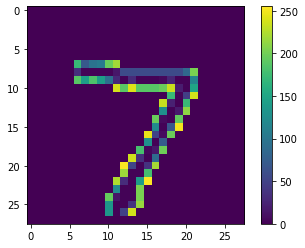

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_images[0].reshape(28,28)*255)
plt.colorbar()
plt.grid(False)
plt.show()